# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Salwa Fairus Santoso
- Email: iwacooyml@gmail.com
- Id Dicoding: fairus

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Modul standar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import collections

# Preprocessing dan pembagian data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

# Model klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Evaluasi model
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Penanganan data tidak seimbang
from imblearn.over_sampling import SMOTE

from sqlalchemy import create_engine


### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Read dataset
df = pd.read_csv(dataset_url, delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Penjelasan Fitur Dataset Mahasiswa

- **Marital status** – Status hubungan sipil mahasiswa saat pertama kali mendaftar ke perguruan tinggi.
- **Application mode** – Skema atau metode penerimaan yang diikuti mahasiswa dalam proses seleksi masuk.
- **Application order** – Posisi prioritas program studi yang dipilih oleh mahasiswa saat mendaftar, dari 0 (pilihan utama) hingga 9 (pilihan terakhir).
- **Course** – Program studi atau jurusan yang diambil oleh mahasiswa selama masa studi.
- **Daytime/evening attendance** – Jadwal kehadiran kuliah, apakah mahasiswa mengikuti kelas di siang hari atau pada malam hari.
- **Previous qualification** – Jenjang pendidikan yang telah diselesaikan mahasiswa sebelum mendaftar di perguruan tinggi.
- **Previous qualification (grade)** – Skor atau nilai akhir dari pendidikan sebelumnya, dengan skala antara 0 hingga 200.
- **Nacionality** – Negara asal atau kewarganegaraan mahasiswa.
- **Mother's qualification** – Tingkat pendidikan formal tertinggi yang pernah ditempuh oleh ibu mahasiswa.
- **Father's qualification** – Tingkat pendidikan formal tertinggi yang pernah ditempuh oleh ayah mahasiswa.
- **Mother's occupation** – Profesi atau jenis pekerjaan yang dilakukan oleh ibu mahasiswa.
- **Father's occupation** – Profesi atau jenis pekerjaan yang dilakukan oleh ayah mahasiswa.
- **Admission grade** – Nilai seleksi masuk yang menjadi dasar penerimaan mahasiswa di program studi yang dipilih.
- **Displaced** – Menunjukkan apakah mahasiswa berasal dari kondisi geografis atau sosial yang membuatnya harus pindah tempat tinggal.
- **Educational special needs** – Status apakah mahasiswa memiliki kebutuhan belajar khusus yang memerlukan perhatian tambahan.
- **Debtor** – Informasi apakah mahasiswa memiliki tanggungan atau kewajiban pembayaran yang belum diselesaikan.
- **Tuition fees up to date** – Menandakan apakah mahasiswa telah memenuhi kewajiban pembayaran biaya kuliah secara tepat waktu.
- **Gender** – Jenis kelamin mahasiswa, dikodekan sebagai 1 untuk laki-laki dan 0 untuk perempuan.
- **Scholarship holder** – Status apakah mahasiswa menerima bantuan finansial atau beasiswa.
- **Age at enrollment** – Usia mahasiswa ketika resmi terdaftar sebagai mahasiswa baru.
- **International** – Menandakan apakah mahasiswa berasal dari luar negeri.
- **Curricular units 1st sem (credited)** – Jumlah mata kuliah di semester pertama yang disetarakan atau diakui dari pendidikan sebelumnya.
- **Curricular units 1st sem (enrolled)** – Total mata kuliah yang diambil oleh mahasiswa pada semester pertama.
- **Curricular units 1st sem (evaluations)** – Jumlah penilaian atau evaluasi akademik yang dilakukan terhadap mata kuliah semester pertama.
- **Curricular units 1st sem (approved)** – Jumlah mata kuliah semester pertama yang berhasil diselesaikan dengan nilai lulus.


In [4]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
# Menampilkan fitur kategorikal beserta nilai uniknya
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Kolom: {col}")
    print("Nilai unik:", df[col].unique(), '\n')


Kolom: Status
Nilai unik: ['Dropout' 'Graduate' 'Enrolled'] 



In [6]:
print(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Tidak terdapat data kosong pada dataset ini

In [7]:
print(df.duplicated().sum())

0


## Data Preparation / Preprocessing

In [8]:
def decode_labels(dataframe, columns):
    """
    Mengubah nilai kategori numerik menjadi label kategori aslinya pada kolom tertentu dalam DataFrame.

    Parameter:
        dataframe (pandas.DataFrame): DataFrame yang berisi kolom-kolom numerik.
        columns (str atau list dari str): Nama kolom atau daftar nama kolom yang akan dikonversi.

    Return:
        pandas.DataFrame: DataFrame dengan kolom yang sudah dikonversi ke label kategori.
    """

    mappings = {
        'Marital_status': {
            1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
            5: 'Facto Union', 6: 'Legally Seperated'
        },
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode': {
            1: '1st Phase - General Contingent', 2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)', 7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99', 15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)', 17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent', 26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)', 39: 'Over 23 Years Old',
            42: 'Transfer', 43: 'Change of Course', 44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course', 53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies', 171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)', 9003: 'Agronomy', 9070: 'Communication Design',
            9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130: 'Equinculture',
            9147: 'Management', 9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing',
            9556: 'Oral Hygiene', 9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication', 9853: 'Basic Education', 9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English',
            17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
            101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.', 2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree', 4: "Higher Education - Master's", 5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education', 9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed', 11: '7th Year (Old)', 12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course', 14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed', 18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 20: 'Complementary High School Course',
            22: 'Technical - Professional Course', 25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling', 27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed', 30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce', 33: 'Supplementary Accounting and Administration',
            34: 'Unknown', 35: "Can't Read or Write", 36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.', 38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course', 40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course', 42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)', 44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student', 1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities', 3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff', 5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen', 8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers', 10: 'Armed Forces Professions', 90: 'Other Situation', 99: '(Blank)',
            101: 'Armed Forces Officers', 102: 'Armed Forces Sergeants', 103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services', 114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals', 123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)', 131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians', 141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff', 151: 'Personal Service Workers', 152: 'Sellers',
            153: 'Personal Care Workers and the Like', 154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators', 182: 'Assembly Workers', 183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers', 192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants', 195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    # Salin kategori lain yang menggunakan kategori sama
    for qual_col in ['Previous_qualification', 'Mothers_qualification', 'Fathers_qualification']:
        mappings[qual_col] = mappings['Qualification']

    for occ_col in ['Mothers_occupation', 'Fathers_occupation']:
        mappings[occ_col] = mappings['Occupation']

    bin_cols = ['Displaced', 'Educational_special_needs', 'Debtor',
                'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']
    bin_map = {0: 'No', 1: 'Yes'}

    if isinstance(columns, str):
        columns = [columns]

    for col in columns:
        if col in mappings:
            dataframe[col] = dataframe[col].map(mappings[col])
        elif col in bin_cols:
            dataframe[col] = dataframe[col].map(bin_map)

    return dataframe


In [9]:
df_view = df.copy()

df_view = decode_labels(df_view, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

df_view

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General Contingent,6,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,154.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase - General Contingent,1,Management,Daytime,Secondary Education - 12th Year of Schooling o...,180.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [10]:
for col in df_view.select_dtypes(include='object'):
    print(col)
    print(df_view[col].unique(), '\n')


Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Seperated'] 

Application_mode
['2nd Phase - General Contingent' 'International Student (Bachelor)'
 '1st Phase - General Contingent' 'Over 23 Years Old'
 '3rd Phase - General Contingent' 'Short Cycle Diploma Holders'
 'Technological Specialization Diploma Holders'
 'Change of Institution/Course' 'Change of Course'
 'Holders of Other Higher Courses' 'Transfer'
 '1st Phase - Special Contingent (Madeira Island)'
 '1st Phase - Special Contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of Institution/Course (International)'
 'Ordinance No. 533-A/99, Item B2 (Different Plan)'
 'Ordinance No. 533-A/99, Item B3 (Other Institution)'] 

Course
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (Evening Attendance)'
 'Management (Evening Attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Bas

In [11]:
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

In [12]:
# Dataset for Business Dashboard
df_view.to_csv('data_cleaned.csv', index=False)

## EDA

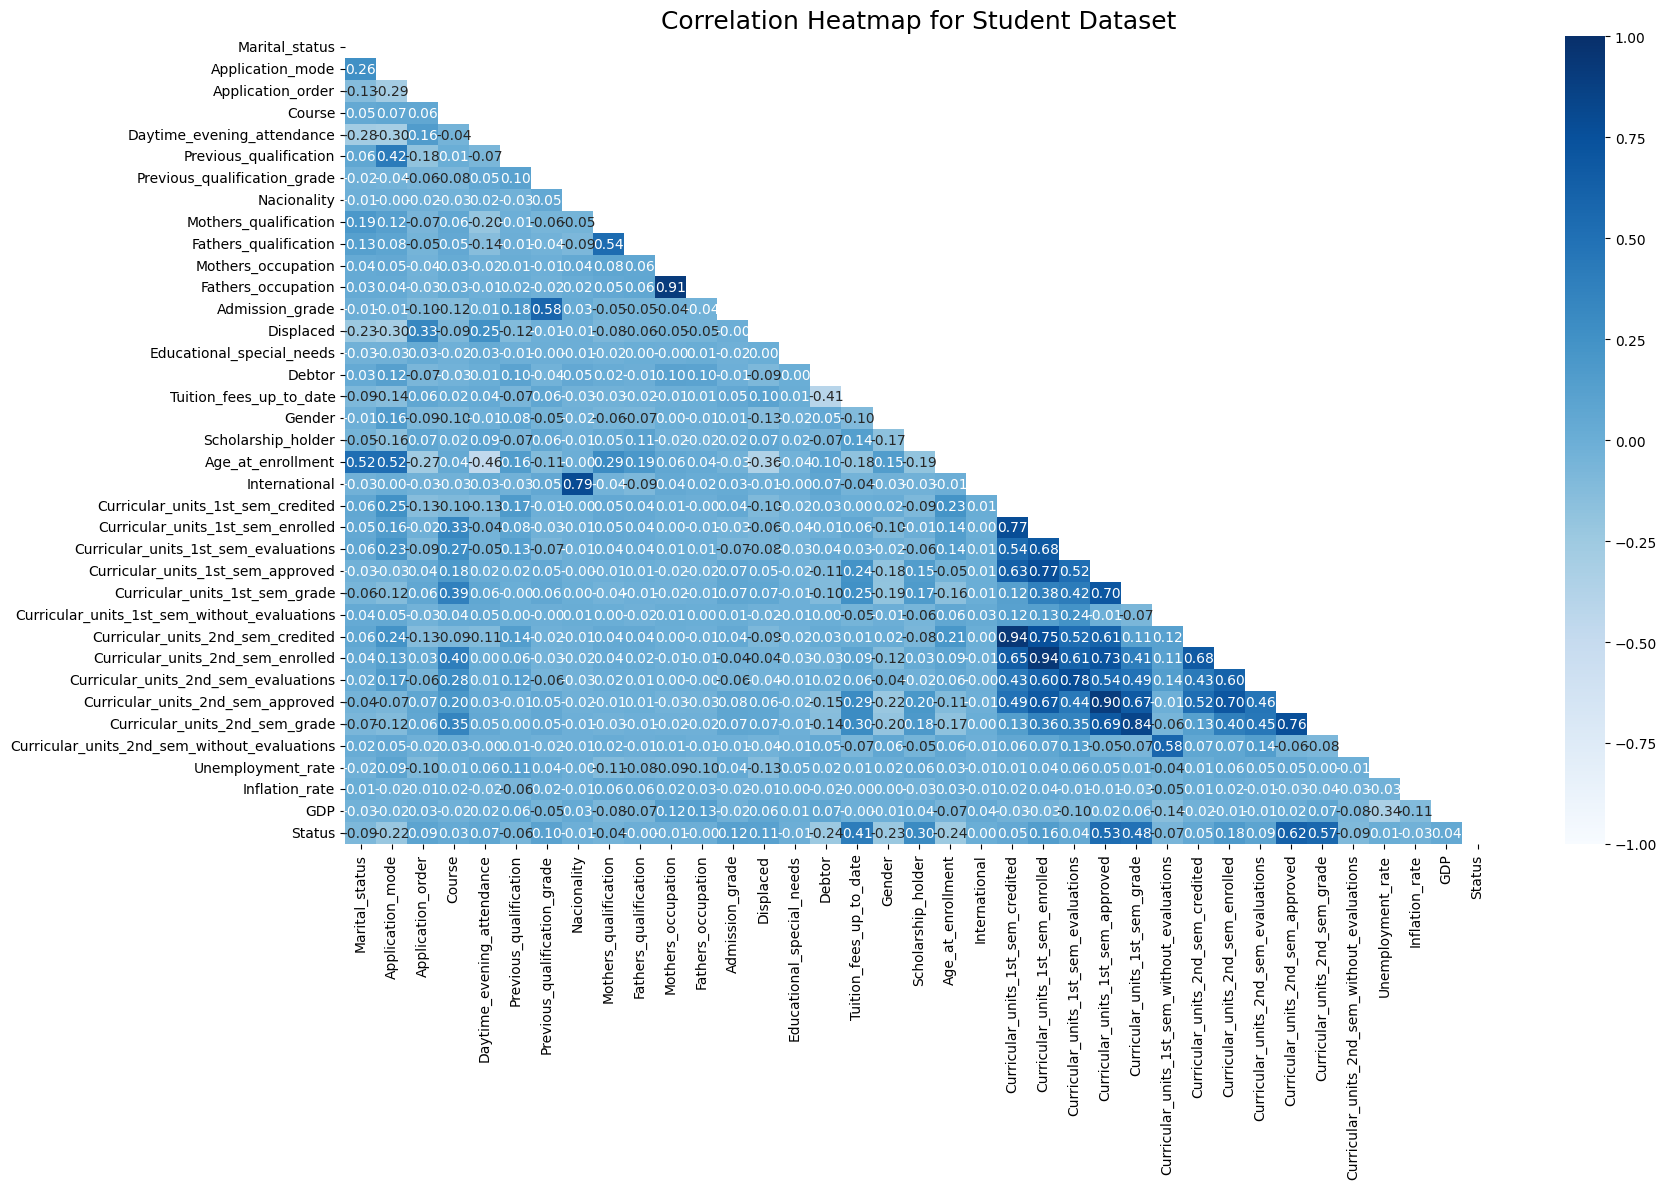

In [13]:
plt.figure(figsize=(18, 12))
corr_mat = df.corr(numeric_only=True).round(3)
upper_triangle_mask = np.triu(np.ones(corr_mat.shape, dtype=bool))

sns.heatmap(corr_mat, annot=True, cmap='Blues', vmin=-1, vmax=1, mask=upper_triangle_mask, fmt='.2f')
plt.title('Correlation Heatmap for Student Dataset', fontsize=18)
plt.tight_layout()
plt.show()


## Analisis Berdasarkan Matriks Korelasi

Berdasarkan plot matriks korelasi di atas, berikut adalah beberapa poin terkait hubungan antar fitur dengan variabel target `Status`:

### 1. **Fairly Strong Influence**
Fitur yang memiliki pengaruh cukup kuat terhadap `Status`:
- `Curricular_units_2nd_sem_approved`
- `Curricular_units_2nd_sem_grade`

Kedua fitur ini menggambarkan kinerja akademik pada semester kedua, yang kemungkinan besar berperan signifikan dalam menentukan status mahasiswa (misalnya dropout, masih kuliah, atau lulus).

### 2. **Moderate Influence**
Fitur yang memiliki pengaruh sedang terhadap `Status`:
- `Curricular_units_1nd_sem_approved`
- `Curricular_units_1nd_sem_grade`
- `Tuition_fees_up_to_date`
- `Scholarship_holder`

Fitur-fitur ini mencerminkan kinerja pada semester pertama dan kondisi keuangan, yang berdampak cukup signifikan terhadap hasil akhir mahasiswa.

### 3. **Low Influence**
Fitur yang memiliki pengaruh rendah terhadap `Status`:
- `Age_at_enrollment`
- `Debtor`
- `Gender`
- `Application_mode`

Fitur-fitur ini mungkin memiliki kontribusi dalam prediksi, namun pengaruhnya secara individu cukup terbatas.

### 4. **Very Weak Influence**
Fitur lainnya menunjukkan pengaruh yang sangat lemah terhadap `Status`, yang berarti kekuatannya dalam memprediksi hasil akhir mahasiswa sangat kecil jika dilihat secara terpisah.


In [14]:
def create_pie_chart(column_data, chart_title):
    """
    Membuat diagram pie untuk distribusi data kategori pada sebuah kolom.

    Parameter:
    - column_data: pandas.Series atau DataFrame kolom, data kategori yang akan dipetakan.
    - chart_title: str, judul grafik yang akan ditampilkan.

    Keluaran:
    Menampilkan grafik pie, tanpa mengembalikan nilai.
    """
    counts = column_data.value_counts()
    plt.figure(figsize=(7,7))
    plt.pie(counts, labels=counts.index,
            autopct=lambda pct: f"{int(pct * counts.sum() / 100)} ({pct:.1f}%)",
            startangle=90, shadow=True)
    plt.title(f'Proporsi {chart_title}')
    plt.axis('equal')  # agar pie chart berbentuk lingkaran sempurna
    plt.show()


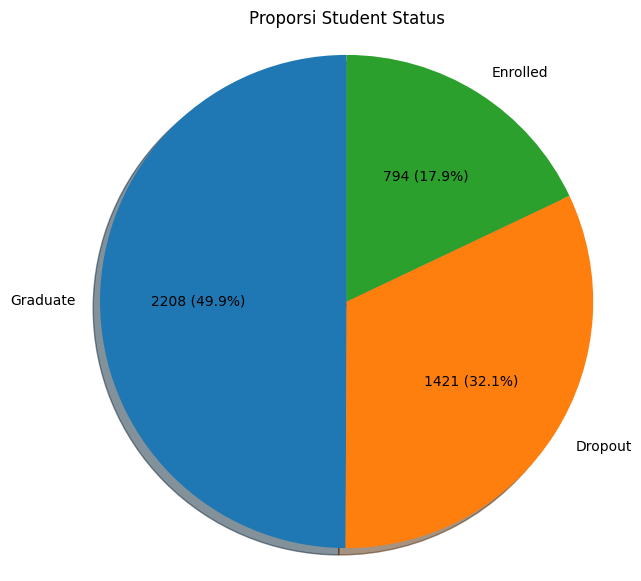

In [15]:
create_pie_chart(df_view['Status'], 'Student Status')

### Distribusi Status Mahasiswa

Mahasiswa dengan status **Graduate** memiliki persentase tertinggi, yaitu **50%**, diikuti oleh mahasiswa dengan status **Dropout** sebesar **32%**, dan yang paling rendah adalah mahasiswa dengan status **Enrolled**, yaitu hanya **18%**.


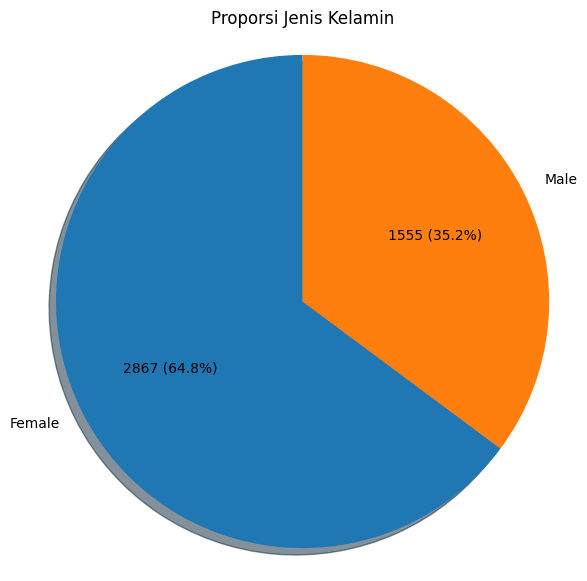

In [16]:
create_pie_chart(df_view['Gender'], 'Jenis Kelamin')

Jenis kelamin perempuan mendominasi sebesar 65% dari pada laki-laki yang hanya 35%

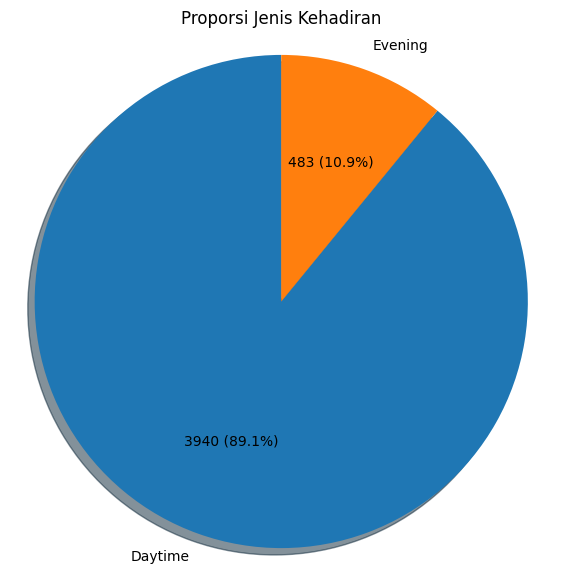

In [17]:
create_pie_chart(df_view['Daytime_evening_attendance'], 'Jenis Kehadiran')

### Proporsi Jenis Kehadiran Mahasiswa

Berdasarkan diagram pie, mayoritas mahasiswa mengikuti perkuliahan pada **siang hari (Daytime)**, dengan total sebanyak **3.940 mahasiswa (89%)**. Sementara itu, hanya **483 mahasiswa (11%)** yang mengikuti perkuliahan pada **malam hari (Evening)**.

Hal ini menunjukkan bahwa sistem perkuliahan siang masih menjadi pilihan utama bagi sebagian besar mahasiswa, kemungkinan karena keterbatasan waktu atau preferensi jadwal belajar. Sementara program malam mungkin ditujukan untuk mahasiswa yang bekerja atau memiliki komitmen lain di siang hari.


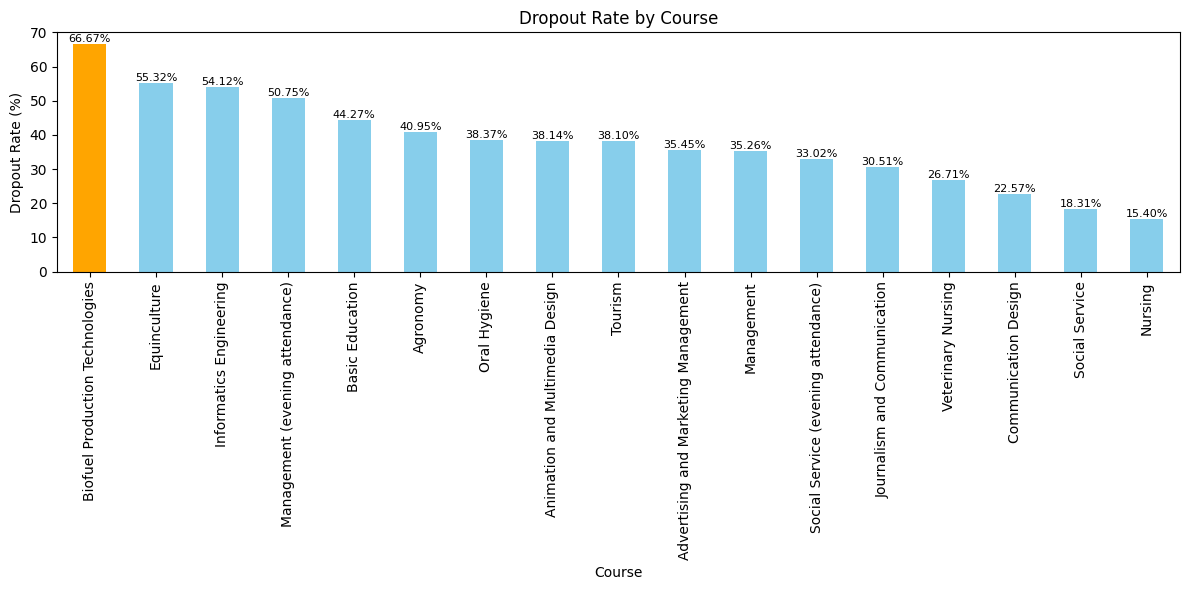

In [18]:
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Hitung jumlah mahasiswa per mata kuliah
total_students_per_course = df['Course'].value_counts()

# Filter DataFrame untuk hanya status 'Dropout' (status 0)
dropout_students = df[df['Status'] == 0]

# Hitung jumlah mahasiswa dropout per mata kuliah
dropout_per_course = dropout_students['Course'].value_counts()

# Hitung dropout rate
dropout_rate = (dropout_per_course / total_students_per_course * 100).fillna(0) # Handle courses with no dropouts

# Urutkan dropout rate untuk visualisasi yang lebih baik
dropout_rate = dropout_rate.sort_values(ascending=False)

# Ganti ID mata kuliah dengan nama mata kuliah menggunakan mapping
dropout_rate.index = dropout_rate.index.map(course_mapping)

plt.figure(figsize=(12, 6))
colors = ['orange' if i == dropout_rate.idxmax() else 'skyblue' for i in dropout_rate.index]
dropout_rate.plot(kind='bar', color=colors)
plt.title("Dropout Rate by Course")
plt.ylabel("Dropout Rate (%)")
plt.xticks(rotation=90)
for i, val in enumerate(dropout_rate):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

Insight: Tiga jurusan teratas ini (Biofuel, Equiculture, Informatics) merupakan program yang bersifat sangat teknis/spesialis. Tingginya dropout kemungkinan besar berkaitan dengan:

- Kurikulum yang padat atau tidak dialokasikan dengan baik (praktikum lapangan, bahan ajar, dsb.).

- Sarana/prasarana praktik yang terbatas (misalnya fasilitas laboratorium/hidroponik untuk Biofuel, kandang dan pawang untuk Equiculture).

- Kesiapan akademik mahasiswa (ICT: gap antara latar belakang SMA/SMK dengan tuntutan pemrograman di perguruan tinggi).

## Preprocessing

In [19]:
# Membuat dictionary pemetaan kelas encoding
mapping_status = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Hapus baris dengan Status bernilai 1 (misal 'Enrolled')
filtered_df = df[df['Status'] != 1].copy()
filtered_df.reset_index(drop=True, inplace=True)

# Ganti nilai Status yang 2 menjadi 1
filtered_df['Status'] = filtered_df['Status'].replace({2: 1})

filtered_df


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [20]:
filtered_df['Status'].value_counts()

,count
Status,
1,2209
0,1421


## Feature Selection

In [21]:
# Seleksi fitur dengan korelasi absolut terhadap 'Status' lebih dari atau sama dengan 0.1
corr_matrix = filtered_df.corr(numeric_only=True)
selected_features = [col for col, val in corr_matrix['Status'].abs().items() if val >= 0.1]

# Ambil hanya kolom terpilih dari DataFrame
df_selected = filtered_df[selected_features]

# Tampilkan hasil
df_selected


,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [22]:
df_selected.shape

(3630, 19)

In [23]:
df_selected.describe()

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,132.920606,127.293939,0.549036,0.113774,0.866116,0.344077,0.266942,23.461157,6.337466,4.791460,10.534860,6.296419,7.763085,4.518457,10.036155,0.142149,0.608540
std,0.613009,17.358595,13.238373,14.611295,0.497658,0.317580,0.340575,0.475132,0.442423,7.827994,2.570773,3.237845,5.057694,2.263020,3.964163,3.162376,5.481742,0.747670,0.488144
min,1.000000,1.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,125.000000,118.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,5.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.517857,0.000000,0.000000
50%,1.000000,17.000000,133.100000,126.500000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000,5.000000,12.341429,6.000000,8.000000,5.000000,12.333333,0.000000,1.000000
75%,1.000000,39.000000,140.000000,135.100000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,7.000000,6.000000,13.500000,7.000000,10.000000,6.000000,13.500000,0.000000,1.000000
max,6.000000,57.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429,12.000000,1.000000


In [24]:
df_selected.to_csv('data_selected.csv', index=False)

## Data Splitting

In [25]:
X = df_selected.drop(['Status'], axis=1)
y = df_selected['Status']

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Lakukan oversampling dengan SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Hitung distribusi label sebelum dan sesudah
original_dist = Counter(y)
resampled_dist = Counter(y_resampled)

# Buat DataFrame perbandingan
balance_check = pd.DataFrame({
    'Sebelum_SMOTE': pd.Series(original_dist),
    'Sesudah_SMOTE': pd.Series(resampled_dist)
})

# Tambahkan baris total
balance_check.loc['Jumlah_Semua'] = balance_check.sum()

balance_check

,Sebelum_SMOTE,Sesudah_SMOTE
0,1421,2209
1,2209,2209
Jumlah_Semua,3630,4418


## Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 18)
y_train : (3534,)
X_test  : (884, 18)
y_test  : (884,)


In [28]:
# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melatih dan menerapkan transformasi pada data pelatihan
X_train = scaler.fit_transform(X_train)

# Menerapkan transformasi yang sama pada data pengujian
X_test = scaler.transform(X_test)

# Menampilkan hasil transformasi
print("Hasil Standardisasi X_train:\n", X_train, "\n")
print("Hasil Standardisasi X_test:\n", X_test)

Hasil Standardisasi X_train:
 [[-3.06300031e-01 -8.78287715e-01 -2.07970249e-01 ... -6.21731310e-01
   1.02183021e+00 -1.93648557e-01]
 [-3.06300031e-01 -1.30589271e-01 -7.44331079e-01 ...  6.32735404e-01
   6.91705851e-01 -1.93648557e-01]
 [-3.06300031e-01 -1.05083351e+00 -1.36409938e+00 ...  5.50204699e-03
   4.29202358e-01 -1.93648557e-01]
 ...
 [ 6.38590591e+00  1.13474656e+00  3.81264042e-02 ...  5.50204699e-03
   4.29202358e-01 -1.93648557e-01]
 [-3.06300031e-01 -1.05083351e+00 -1.28662834e+00 ...  6.32735404e-01
   4.71935485e-01 -1.93648557e-01]
 [-3.06300031e-01 -7.05741920e-01 -2.02033813e-01 ... -1.24896467e+00
  -1.57925460e+00  5.32533533e+00]] 

Hasil Standardisasi X_test:
 [[-0.30630003 -1.05083351  0.56633592 ...  0.31911873  0.57648978
  -0.19364856]
 [ 1.36675145  1.36480762 -0.20203381 ... -0.62173131  0.13007047
  -0.19364856]
 [-0.30630003 -0.70574192  0.57267657 ...  0.6327354   1.2197652
  -0.19364856]
 ...
 [-0.30630003 -0.07307401 -0.82180212 ...  0.6327354   0

## Modeling

In [29]:
# Membuat daftar model klasifikasi
model_list = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SupportVectorMachine': SVC(class_weight='balanced', max_iter=10000),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced'),
    'GradientBoosting': GradientBoostingClassifier(),
    'RandomForest': RandomForestClassifier(class_weight='balanced'),
    'KNearestNeighbors': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB()
}

# Menyimpan hasil evaluasi dalam dictionary
hasil_evaluasi = {
    'Akurasi': [],
    'Presisi': [],
    'Recall': [],
    'F1_Score': []
}

# Melatih setiap model dan menghitung metrik evaluasi
for nama_model, clf in model_list.items():
    clf.fit(X_train, y_train)
    hasil_prediksi = clf.predict(X_test)

    hasil_evaluasi['Akurasi'].append(accuracy_score(y_test, hasil_prediksi))
    hasil_evaluasi['Presisi'].append(precision_score(y_test, hasil_prediksi))
    hasil_evaluasi['Recall'].append(recall_score(y_test, hasil_prediksi))
    hasil_evaluasi['F1_Score'].append(f1_score(y_test, hasil_prediksi))

In [30]:
# Membuat DataFrame dari hasil evaluasi model
df_evaluasi_model = pd.DataFrame(hasil_evaluasi, index=model_list.keys())
df_evaluasi_model


,Akurasi,Presisi,Recall,F1_Score
LogisticRegression,0.907240,0.871901,0.954751,0.911447
SupportVectorMachine,0.900452,0.858300,0.959276,0.905983
DecisionTree,0.871041,0.898058,0.837104,0.866511
GradientBoosting,0.899321,0.874735,0.932127,0.902519
RandomForest,0.903846,0.880597,0.934389,0.906696
KNearestNeighbors,0.872172,0.832323,0.932127,0.879402
NaiveBayes,0.845023,0.801980,0.916290,0.855333


### Insight:

- **Logistic Regression** memiliki performa terbaik secara keseluruhan, dengan akurasi tertinggi (**90.72%**) dan F1-Score tertinggi (**91.14%**), serta recall paling tinggi, menandakan kemampuannya dalam menangkap sebagian besar kasus yang relevan.
- **Support Vector Machine** juga sangat kompetitif, dengan recall tertinggi (**95.93%**) dan F1-Score yang hampir setara dengan Logistic Regression.
- **Random Forest** dan **Gradient Boosting** menunjukkan performa yang seimbang dan kuat, dengan F1-Score di atas 90%.
- **Decision Tree** meskipun memiliki presisi yang tinggi (**88.06%**), namun recall-nya relatif lebih rendah, yang bisa berarti model lebih ketat dalam mengklasifikasikan positif.
- **K-Nearest Neighbors** cukup baik dalam recall (**93.21%**), namun presisinya rendah, mengindikasikan banyak prediksi positif palsu.
- **Naive Bayes** adalah model dengan performa terendah di antara yang lain pada semua metrik, namun tetap memberikan hasil yang cukup layak untuk baseline.

Secara keseluruhan, **Logistic Regression** dan **Random Forest** merupakan kandidat terbaik untuk digunakan dalam sistem prediksi status mahasiswa berdasarkan performa metrik evaluasi.

In [31]:
model_rf = RandomForestClassifier(class_weight='balanced')
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [32]:
y_train_rf = model_rf.predict(X_train)
y_test_rf = model_rf.predict(X_test)

## Evaluation

In [33]:
def report_evaluation(y_train, y_pred, title='Dataset'):
    print(f'Laporan Klasifikasi untuk {title}')
    print(classification_report(y_train, y_pred))

    plt.figure(figsize=(4, 3))
    matriks_konfusi = confusion_matrix(y_train, y_pred)
    sns.heatmap(matriks_konfusi, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Label Prediksi', fontsize=10)
    plt.ylabel('Label Sebenarnya', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

Laporan Klasifikasi untuk Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1767
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534



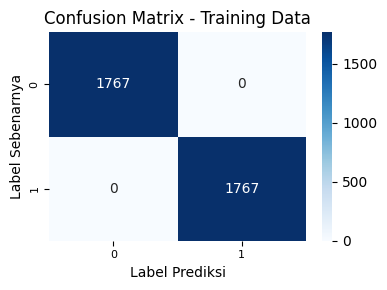

In [34]:
report_evaluation(y_train, y_train_rf, title='Training Data')

Laporan Klasifikasi untuk Testing Data
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       442
           1       0.88      0.93      0.91       442

    accuracy                           0.90       884
   macro avg       0.90      0.90      0.90       884
weighted avg       0.90      0.90      0.90       884



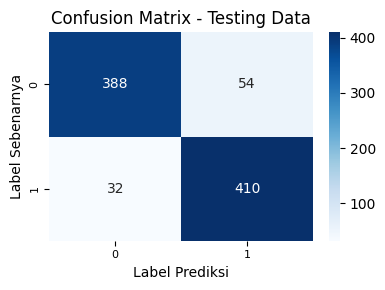

In [35]:
report_evaluation(y_test, y_test_rf, title='Testing Data')

### Insight:

- Model menunjukkan **perfoma sempurna** di data training dengan semua metrik (Precision, Recall, dan F1-Score) bernilai **1.00** untuk kedua kelas.
- Hal ini mengindikasikan bahwa **tidak ada kesalahan klasifikasi** yang terjadi pada data training.
- Meskipun terlihat sangat bagus, performa sempurna ini juga bisa menjadi **indikasi overfitting**, di mana model terlalu menyesuaikan diri terhadap data training dan mungkin tidak sebaik itu saat diuji di data testing.
- Evaluasi lebih lanjut pada data testing sangat penting untuk memastikan bahwa model benar-benar memiliki kemampuan generalisasi yang baik.


In [36]:
# Parameter grid yang telah dimodifikasi
grid_param = {
    'n_estimators': [150, 300],
    'criterion': ['gini'],
    'max_depth': [None, 15],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'class_weight': ['balanced']
}

# Inisialisasi GridSearchCV dengan parameter baru
grid_search = GridSearchCV(
    estimator=model_rf,  #
    param_grid=grid_param,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'criterion': ['gini'], 'max_depth': [None, 15],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [150, 300]},
             verbose=2)

In [37]:
# Latih model dengan mencari best param
best_model = grid_search.fit(X_train, y_train)
best_model.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=150)

In [38]:
# Predik training dan testing data menggunakan best model
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

Laporan Klasifikasi untuk Training Data Best Model
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1767
           1       0.98      1.00      0.99      1767

    accuracy                           0.99      3534
   macro avg       0.99      0.99      0.99      3534
weighted avg       0.99      0.99      0.99      3534



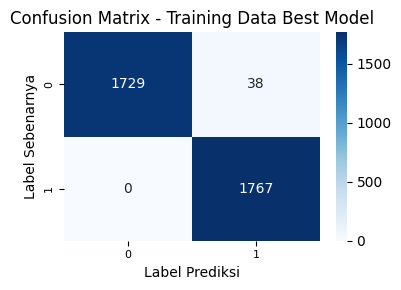

In [39]:
report_evaluation(y_train, y_train_best, title='Training Data Best Model')

Laporan Klasifikasi untuk Testing Data Best Model
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       442
           1       0.88      0.94      0.91       442

    accuracy                           0.90       884
   macro avg       0.91      0.90      0.90       884
weighted avg       0.91      0.90      0.90       884



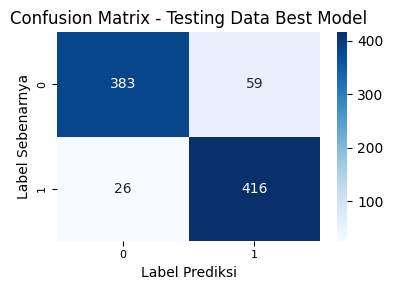

In [40]:
report_evaluation(y_test, y_test_best, title='Testing Data Best Model')

### Insight:

- **Akurasi model pada data testing adalah 91%**, yang menunjukkan performa prediksi yang sangat baik secara keseluruhan.
- Untuk **kelas 0**, precision tinggi (0.94) menunjukkan bahwa sebagian besar prediksi kelas 0 benar, namun recall-nya sedikit lebih rendah (0.87), yang berarti masih ada beberapa data kelas 0 yang tidak teridentifikasi dengan benar.
- Sebaliknya, **kelas 1** memiliki recall tinggi (0.94), menunjukkan bahwa hampir semua data kelas 1 berhasil dikenali, meskipun precision-nya sedikit lebih rendah (0.88).
- Nilai **f1-score** yang seimbang (sekitar 0.90–0.91) menunjukkan bahwa model mampu menjaga keseimbangan antara precision dan recall pada kedua kelas.
- Tidak ada tanda-tanda overfitting yang parah karena hasil testing masih cukup tinggi dan tidak terlalu jauh dari hasil training.

## Save Model

In [43]:
joblib.dump(best_model, 'model_rf_param.joblib')

['model_rf_param.joblib']

In [42]:
!pip freeze > requirements.txt